In [1]:
import tensorflow as tf
print(tf.__version__)
print(len(tf.config.list_physical_devices('GPU'))>0)

2.6.4
True


In [2]:
import numpy as np
import pandas as pd

In [3]:
# What is Pycocotools?
# pycocotools is a Python API that. assists in loading, parsing and visualizing the annotations in COCO.

In [4]:
# !pip install pycocotools

In [5]:

import numpy as np
import torch 
from torch.utils.data import DataLoader, Dataset 
import nltk
from torch.utils import data
from torchvision import transforms
from PIL import Image
%matplotlib inline
# from pycocotools.coco import COCO
import pickle as pkl

In [6]:
import random
import json
from tensorflow.keras.preprocessing.text import Tokenizer

In [7]:
import os
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,LSTM,Input,Embedding,Dropout,add
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
import collections
import numpy as np
import os
import time
import re

import os
import numpy as np
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,LSTM,Input,Embedding,Dropout,add
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
from glob import glob
import numpy as np
import torch 
from torch.utils.data import DataLoader, Dataset 
import nltk
from torch.utils import data
from torchvision import transforms
from PIL import Image
%matplotlib inline
# from pycocotools.coco import COCO
import pickle as pkl
from nltk.translate.bleu_score import corpus_bleu
# import visualkeras
import random
from tensorflow.keras.models import Sequential
import json
from tensorflow.keras.preprocessing.text import Tokenizer
import os
from tqdm.notebook import tqdm
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,LSTM,Input,Embedding,Dropout,add
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Dropout,BatchNormalization,Activation
import collections
import numpy as np
import os
import time
import re
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate

In [9]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [10]:
import cv2
import matplotlib.pyplot as plt

In [11]:
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions
incept_model = InceptionV3(include_top=True, weights='imagenet')
last = incept_model.layers[-2].output
incept_model = Model(inputs=incept_model.input, outputs=last)

# modelVGG=VGG19(weights='imagenet',
#                   include_top=True,
#                   input_shape=(224, 224, 3)
#            )

# # Restructing the model by poping that layer which was only used for predicting the classes
# modelVGG=Model(inputs=modelVGG.inputs,outputs=modelVGG.layers[-2].output)

96124928/96112376 [==============================] - 1s 0us/step


In [12]:
incept_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.8/989.8 kB 3.7 MB/s eta 0:00:00


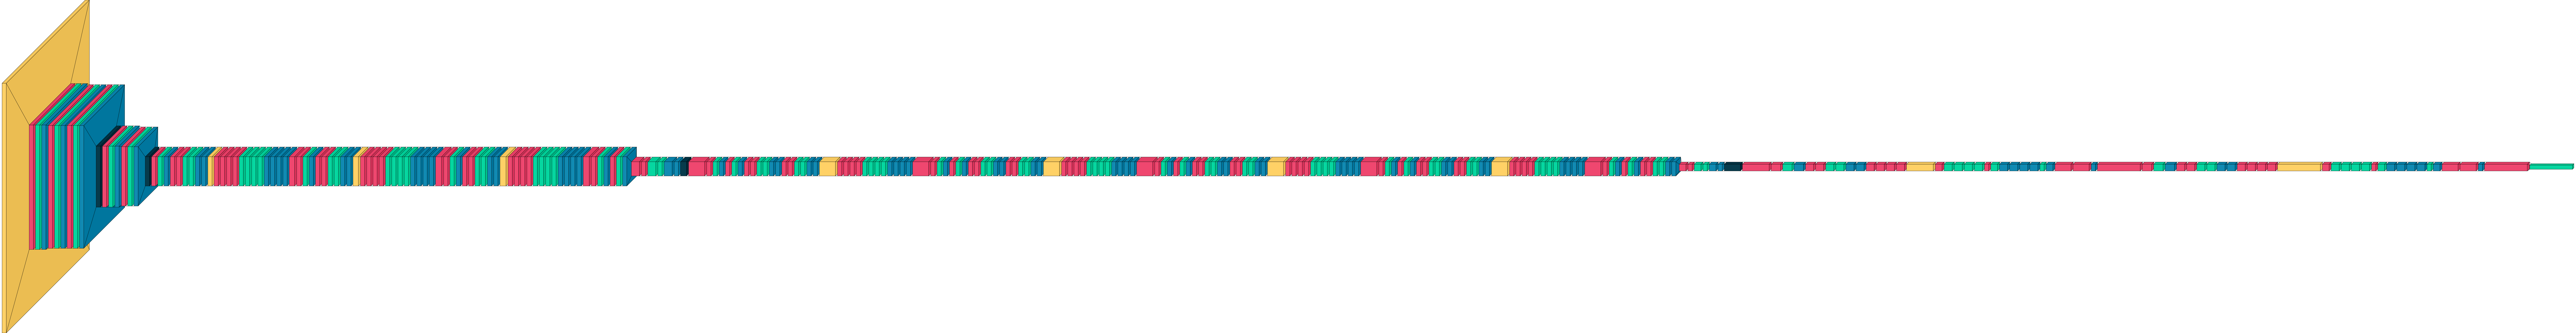

In [13]:
# Visualize the model
!pip install visualkeras
import visualkeras

visualkeras.layered_view(incept_model) 

In [14]:
# Get Image & Target Value Locations
annotation_file = '/kaggle/input/flicker8k-captions/captions.txt'
PATH = '/kaggle/input/flicker8k-dataset/'

In [15]:
# Read in the target values
f=open(annotation_file, 'rb')
# print(f.read())

captions=f.read().decode('utf-8').split('\n')
captions=captions[1:]

In [16]:
len(captions)

40456

In [17]:
# # Group the target values (captions) with the image paths
# # Group all captions together having the same image ID.
# image_path_to_caption = collections.defaultdict(list)
# for val in annotations['annotations']:
#     caption = f"<start> {val['caption']} <end>"
#     image_path = PATH + '/%012d.jpg' % (val['image_id'])
#     image_path_to_caption[image_path].append(caption)

In [18]:
# image_path_to_caption

In [19]:
# # View resulting dictionary
# # view the first 5 values in image_path_to_caption
# for i, (k, v) in enumerate(image_path_to_caption.items()):
#     print(k, v)
#     print(" ")
#     if i > 5:
#         break

captions[0].split(',')[0]
captions[:10]

['1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg,A girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg,A black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg,A black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg,Two dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg,Two dogs on pavement moving toward each other .']

In [20]:
txt='/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/'+captions[0].split(',')[0]
txt

'/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg'

In [21]:
# Cap training to 6000 images (to reduce runtime, just for tutorial)¶
image_paths=[]

for i in captions:
    txt='/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/'+i.split(',')[0]
    image_paths.append(txt)

random.shuffle(image_paths)

# Select the first 6000 image_paths from the shuffled set.
# Approximately each image id has 5 captions associated with it, so that will
# lead to 30,000 examples.
train_image_paths = list(set(image_paths))
print(len(train_image_paths))

8092


In [22]:
image_paths[:10]

['/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/621000329_84f48948eb.jpg',
 '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/3439331800_e71e1d808f.jpg',
 '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/3336808362_c17837afd8.jpg',
 '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/2955673642_4279b32097.jpg',
 '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/241347803_afb04b12c4.jpg',
 '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/511749704_3037806cb1.jpg',
 '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/421808539_57abee6d55.jpg',
 '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/1358089136_976e3d2e30.jpg',
 '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/2780087302_6a77658cbf.jpg',
 '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/2300229745_af7a20c959.jpg']

In [23]:
captions[0].split(',')

['1000268201_693b08cb0e.jpg',
 'A child in a pink dress is climbing up a set of stairs in an entry way .']

In [24]:
# with open('/kaggle/input/features-flicker8k/img_detail.pkl','rb') as file:
#     features=pkl.load(file)
    
with open('/kaggle/input/inceptionfeatures/image_features_Inception.pkl','rb') as file:
    features=pkl.load(file)

In [25]:
captions_dict = {}
for i in captions:
    try:
        img_name = i.split(',')[0]
        caption = i.split(',')[1]
        if img_name.split('.')[0] in features:
            if img_name not in captions_dict:
                captions_dict[img_name] = [caption]
                
            else:
                captions_dict[img_name].append(caption)
            
    except:
        pass
print(len(captions_dict))

8091


In [26]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'cls ' + modified + ' sep'
    return modified
    
for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)
# captions_dict

In [27]:
# Add image paths and target captions to Python lists¶
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
    if len(image_path.split('/')[6]) == 0:
#         print(image_path)
        pass
    else:
        # for the image path, get the captions
        img=image_path.split('/')[6]
        caption_list = captions_dict[img]
        # add captions to list 'train_captions'
        train_captions.extend(caption_list)
        # add image path to list 'img_name_vector', if we have 5 captions to an image than duplicate the image path 5 times, etc.
        img_name_vector.extend([image_path] * len(caption_list))

In [28]:
# Stats and View of Training Images & Targets
print("Last value of caption_list in for loop: ", caption_list)
print("Last length of caption_list in for loop: ", len(caption_list))
print("")

Last value of caption_list in for loop:  ['cls a man is firing a handgun at a shooting range . sep', 'cls a man wearing ear defenders is shooting a pistol at a white target . sep', 'cls a man with yellow ear protectors is firing a gun in a shooting range . sep', 'cls a person wearing yellow headphones shoots a gun at a target . sep', 'cls someone fires a gun at a indoor shooting range . sep']
Last length of caption_list in for loop:  5



In [29]:
print("First value of train_captions: ", train_captions[0])
print("Length of train_captions: ", len(train_captions))
print("")

First value of train_captions:  cls a race car is spinning out in front of spectators . sep
Length of train_captions:  40455



In [30]:

print("First value of img_name_vector: ", img_name_vector[0])
print("Length of img_name_vector: ", len(img_name_vector))
print("")

First value of img_name_vector:  /kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/3094568845_d0b56c5651.jpg
Length of img_name_vector:  40455



In [31]:
from PIL import Image

cls smoke comes from car in professional race sep


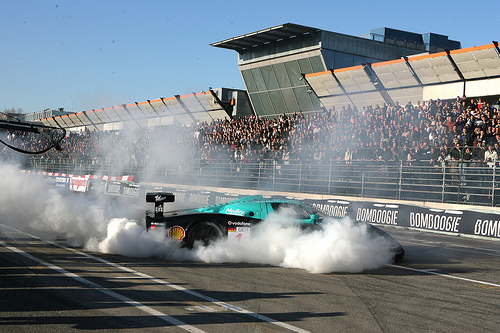

In [32]:
print(train_captions[4])
Image.open(img_name_vector[4])

In [33]:
#Summarizating the model
incept_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [34]:
img_name_vector[0].split('/')[6].split('.')[0],train_captions[0]

('3094568845_d0b56c5651',
 'cls a race car is spinning out in front of spectators . sep')

In [35]:
img_name_vector[1].split('/')[6].split('.')[0],train_captions[0]

('3094568845_d0b56c5651',
 'cls a race car is spinning out in front of spectators . sep')

In [36]:
len(img_name_vector),len(train_captions)

(40455, 40455)

[[0.1097105  0.289197   0.39561218 ... 0.38810015 0.21358149 0.31635475]]


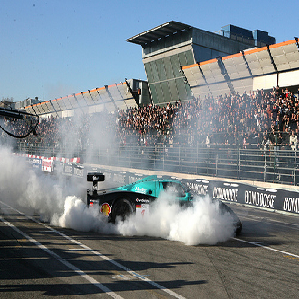

In [37]:
new_img=load_img(img_name_vector[1],target_size=(299,299))

img_array=img_to_array(new_img)
image=img_array.reshape((1,img_array.shape[0],img_array.shape[1],img_array.shape[2]))
image=preprocess_input(image)
img_array.shape,image.shape
prediction=incept_model.predict(image,verbose=0)
print(prediction)
new_img

In [38]:
len(img_name_vector),len(train_image_paths),train_image_paths[1]

(40455,
 8092,
 '/kaggle/input/flicker8k-dataset/Flickr8k_Dataset/Flicker8k_Dataset/107318069_e9f2ef32de.jpg')

In [39]:
train_image_paths[0].split('/')[6].split('.')[0]

'3094568845_d0b56c5651'

In [40]:
for i in range(100,200):
    print(i)
    break

100


In [41]:
# # extracting the features from each image and save it in the dictionary
# x=0
# img_detail={}
# for i in range(100000,118287):
#     new_img=load_img(train_image_paths[i],target_size=(224,224))  # loading image of shape (224,224)
    
#     img_array=img_to_array(new_img)           #converting image pixel to numpy array
    
#     image=img_array.reshape((1,img_array.shape[0],img_array.shape[1],img_array.shape[2])) # reshaping image according to CNN
    
#     image=preprocess_input(image) # preprocess the input image for suitable format to our Vgg19 model
    
#     prediction=model.predict(image,verbose=0) # extracting features from our input
    
#     img_key=train_image_paths[i].split('/')[5].split('.')[0]  #splitting the image name from extension jpg for image id
    
#     img_detail[img_key]=prediction   # store feature as a dictionary in img_detail
#     print(i,"/",118287)

In [42]:
#storing all image details in pickle so that it cant be run again and again inorder to take more time 

# pkl.dump(img_detail,open('/kaggle/input/imagedetail/img_detailCoco.pkl','wb'))

In [43]:
len(features),type(features)

(8091, dict)

In [44]:
len(features), '1481062342_d9e34366c4' in features

(8091, True)

In [45]:
img_name_vector[0].split('/')[6]

'3094568845_d0b56c5651.jpg'

In [46]:
maps={}
for i in range(len(img_name_vector)):
    image_key,caption=img_name_vector[i].split('/')[6],train_captions[i]
    # remove jpg extension from each image name so that it can be use for image id
    image_key=image_key.split('.')[0]
    caption=''.join(caption)
    if image_key not in maps:
        maps[image_key]=[]
    maps[image_key].append(caption)

['cls a man is firing a handgun at a shooting range . sep', 'cls a man wearing ear defenders is shooting a pistol at a white target . sep', 'cls a man with yellow ear protectors is firing a gun in a shooting range . sep', 'cls a person wearing yellow headphones shoots a gun at a target . sep', 'cls someone fires a gun at a indoor shooting range . sep']


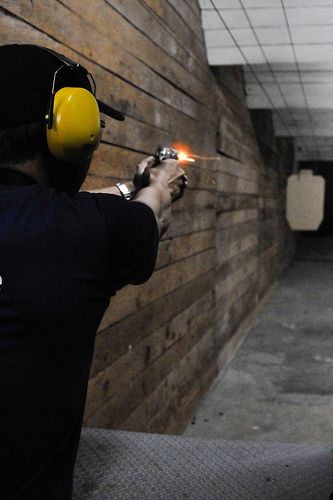

In [47]:
print(maps[image_key])
Image.open(img_name_vector[-1])

In [48]:
# In this function I am going to preprocess the strings by removing others things except text plus converting lowercase letter
#removing spaces 
def preprocess_caption(maps):
    for key,caption in maps.items():
        for i in range(len(caption)):
            captions=re.sub('[^a-zA-Z]',' ',caption[i])
            captions=captions.lower()
            captions=captions.replace('\s+',' ')
            caption[i]=captions

In [49]:
preprocess_caption(maps)
#After preprocessig the caption of the image
print(maps[image_key])

['cls a man is firing a handgun at a shooting range   sep', 'cls a man wearing ear defenders is shooting a pistol at a white target   sep', 'cls a man with yellow ear protectors is firing a gun in a shooting range   sep', 'cls a person wearing yellow headphones shoots a gun at a target   sep', 'cls someone fires a gun at a indoor shooting range   sep']


In [50]:
all_caption=[]
for key in maps:
    for caption in maps[key]:
        all_caption.append(caption)

In [51]:
len(all_caption)

40455

In [52]:
token=Tokenizer()
token.fit_on_texts(all_caption)
vocab_len=len(token.word_index)+1
vocab_len

8276

In [53]:
#lets find the maximum length of the caption available
max_length=max(len(caption.split()) for caption in all_caption)
max_length

35

In [54]:
# train test split
image_keys=list(maps.keys())
split=int(len(image_keys)*0.85)
train=image_keys[:split]
test=image_keys[split:]
len(train),len(test)

(6877, 1214)

In [55]:
#create data generator for fetching image and caption in batch size
# moreover to get data in batch inorder to avoid session crash
def data_generator(data_keys,mapping,features,token,max_length,vocab_len,batch_size):
    #loop over images
    x1,x2,y=list(),list(),list()
    n=0  #to determine whether we reach to batch size or not
    while 1:
        for key in data_keys:  # here data_keys will be image_keys of the training
            n=n+1
            captions=mapping[key]
            #processing each caption
            for caption in captions:
                #encode the sequence
                sequence=token.texts_to_sequences([caption])[0]
                #split the sequences inot x,y pairs
                for i in range(1,len(sequence)):
                    # splitting into input and output pairs
                    input_seq,output_seq=sequence[:i],sequence[i]
                    # pad input  sequences
                    input_seq=pad_sequences([input_seq],maxlen=max_length)[0]
                    
                    #encode output sequence
                    output_seq=to_categorical([output_seq],num_classes=vocab_len)[0]
                    # storing the sequences
                    x1.append(features[key][0])  # store image features
                    x2.append(input_seq)  # store image and text features
                    y.append(output_seq)
            if n==batch_size:
                x1=np.array(x1)
                x2=np.array(x2)
                y=np.array(y)
                yield [x1,x2],y
                x1,x2,y=list(),list(),list()
                n=0
            

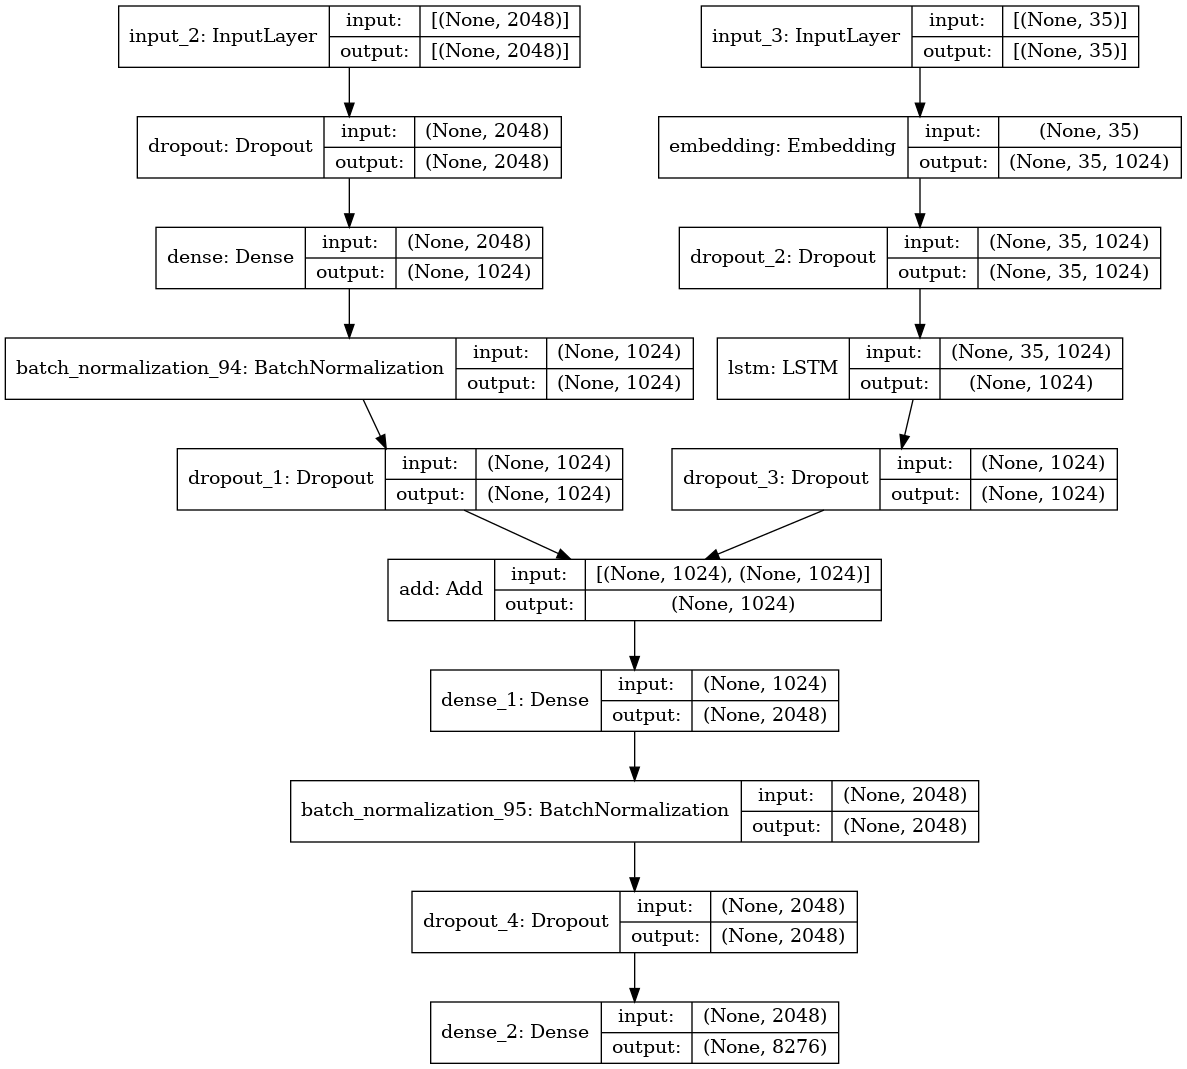

In [56]:
#image feature layers
# LSTM is used to train or track the sequences of the text or caption of the images
# Embedding is used for halding tokenizer
inputs1=Input(shape=(2048,))
feature1=Dropout(0.4)(inputs1)
feature2=Dense(1024,activation='relu')(feature1)
feature3=BatchNormalization()(feature2)
feature4=Dropout(0.5)(feature3)

#sequences features layers
inputs2=Input(shape=(max_length,))
sequence1=Embedding(vocab_len,1024,mask_zero=True)(inputs2)
sequence2=Dropout(0.4)(sequence1)
sequence3=LSTM(1024)(sequence2)
sequence4=Dropout(0.5)(sequence3)

#decoder model
decoder1=add([feature4,sequence4])
decoder2=Dense(2048,activation='relu')(decoder1)
decoder3=BatchNormalization()(decoder2)
decoder4=Dropout(0.5)(decoder3)
outputs=Dense(vocab_len,activation='softmax')(decoder4)

model=Model(inputs=[inputs1,inputs2],outputs=outputs)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
plot_model(model,show_shapes=True)

In [57]:
# #  train the model
# epochs=30
# batch_size=32
# steps=len(train)//batch_size
# for i in range(epochs):
#     #create data generator
#     generator=data_generator(train,maps,features,token,max_length,vocab_len,batch_size)
#     #fit for one epoch
#     print(i+1,"/",epochs)
#     model.fit(generator,epochs=1,steps_per_epoch=steps,verbose=1)
    

In [58]:
# model.save('NewModelInc.h5')

In [59]:
from keras.models import load_model
model =load_model('/kaggle/input/inceptionmodels/BestNewModelInc.h5')

In [60]:
def Extract_Features(img):
    
    new_img=load_img(img,target_size=(299,299))  # loading image of shape (224,224)
    
    img_array=img_to_array(new_img)           #converting image pixel to numpy array
    
    image=img_array.reshape((1,img_array.shape[0],img_array.shape[1],img_array.shape[2])) # reshaping image according to CNN
    
    image=preprocess_input(image) # preprocess the input image for suitable format to our Vgg19 model
    
    prediction=incept_model.predict(image,verbose=0) # extracting features from our input
    
    return prediction

In [61]:
Extract_Features('/kaggle/input/myimages/WhatsApp Image 2023-02-28 at 1.43.39 AM.jpeg')

array([[0.15302639, 0.4630488 , 0.5533913 , ..., 1.0198178 , 0.36730447,
        0.42091247]], dtype=float32)

In [62]:
#comparing index and interger  for generationg caption
def idx_to_word(integer,token):
    for word,index in token.word_index.items():
        if index==integer:
            return word
    return None

In [63]:
# generating caption for an image
def predict_caption(model,image, token,max_length):
    input_text='cls'
    #iterate over the max length of sequence
    for i in range(max_length):
        #encode the sequence
        sequence=token.texts_to_sequences([input_text])[0]
        #pad the sequences
        sequences=pad_sequences([sequence],max_length)
        #predict next word
        y_pred=model.predict([image,sequences],verbose=0)
        #get index with high probability
        y_pred=np.argmax(y_pred)
        #convert index to word
        word=idx_to_word(y_pred,token)
        #stop if word not found
        if word is None:
            break
        #append word as input for generating next word
        input_text+=' '+word
        #stop if we reach end tag
        if word=='sep':
            break
    return input_text

In [64]:
# from nltk.translate.bleu_score import corpus_bleu

# #validate with test dat
# actual,predicted=list(),list()
# for key in tqdm(test):
#     #get actual caption
#     captions=maps[key]
#     #predict the caption for image
#     y_pred=predict_caption(model,features[key],token,max_length)
#     #split into words
#     actual_captions=[caption.split() for caption in captions]
#     y_pred=y_pred.split()
#     #append to list
#     actual.append(actual_captions)
#     predicted.append(y_pred)

In [65]:
# #calculate BLEU score

# print('BLEU-1: %f' %corpus_bleu(actual,predicted,weights=(1.0,0,0,0)))
# print('BLEU-2: %f' %corpus_bleu(actual,predicted,weights=(0.5,0.5,0,0)))

In [66]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_image(image_name):
#     image_id=image_name.split('/')[6].split('.')[0]
    img_path=os.path.join('',image_name)
    image=Image.open(img_path)
#     captions=maps[image_id]
#     print("*****Actual caption******")
#     for caption in captions:
#         print(caption)
    Features=Extract_Features(img_path)
    #predict the caption
    y_pred=predict_caption(model,Features,token,max_length)
    print("****Predicted caption*****")
    print(y_pred)
    plt.imshow(image)

In [67]:
train_image_paths[0].split('/')[6]
# img_name_vector[0]
test[-20:-10]

['300500054_56653bf217',
 '1689658980_0074d81d28',
 '510510783_b2cf5d57bb',
 '1403414927_5f80281505',
 '3490874218_babb404b39',
 '3639428663_dae5e8146e',
 '254901702_67ada9867c',
 '2975018306_0e8da316f5',
 '2909875716_25c8652614',
 '2642688531_8fb68b2147']

****Predicted caption*****
cls a girl in a blue jacket is jumping over a fence sep


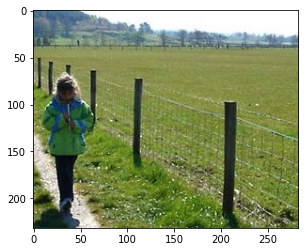

In [68]:
image=train_image_paths[0][:67]+'2380765956_6313d8cae3.jpg'
generate_image(image)